<a href="https://colab.research.google.com/github/PSLeon24/LearnAI/blob/main/covid19_rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## RNN 알고리즘을 통해 코로나 19 확진자 수를 예측하는 인공지능 모델

### Import Library

In [4]:
from keras.models import Sequential # 케라스의 시퀀셜(순차) 모델 import
from keras.layers import SimpleRNN, Dense
'''
레이어 도구 중 SimpleRNN과 Dense 도구를 import
SimpleRNN: 가장 기본적인 순환 신경망
Dense: 각 레이어에서 뉴런의 수
'''
from sklearn.preprocessing import MinMaxScaler # 데이터를 정규화하기 위한 MinMaxScaler() 함수를 import
from sklearn.metrics import mean_squared_error # 결과의 정확도를 계산하기 위한 mean_squared_error() 함수를 import ← 실제 값과 예측 값의 차이를 사용해 오차를 구함
from sklearn.model_selection import train_test_split # 데이터를 훈련 데이터와 검증 데이터로 나누는 train_test_split() 함수를 import ← 인공지능 성능 측정 위해서 나눔
import math
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv

### Import Data

In [5]:
!git clone https://github.com/yhlee1627/deeplearning.git

Cloning into 'deeplearning'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
Unpacking objects: 100% (5/5), 3.03 KiB | 1.51 MiB/s, done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0


In [18]:
dataframe = read_csv('/content/deeplearning/corona_daily.csv', usecols=[3], engine='python', skipfooter=3)
'''
usecols=[3] ← Columns 에서 확진자를 나타내는 Confirmed의 컬럼을 데이터로 사용한다는 뜻
skipfooter=3 ← 뒤에서 3개의 행은 skip
'''
print(dataframe)
dataset = dataframe.values # 확진자 수 데이터만 가져오기
dataset = dataset.astype('float32') # 정규화를 실시할 수 있도록 두 번째 행의 값을 실수로 변환
print(dataset[:5])

     Confirmed
0           24
1           24
2           27
3           27
4           28
..         ...
107      11190
108      11206
109      11225
110      11265
111      11344

[112 rows x 1 columns]
[[24.]
 [24.]
 [27.]
 [27.]
 [28.]]


### Normalize and Classify Data

In [12]:
scaler = MinMaxScaler(feature_range=(0, 1)) # 정규화 범위 0 ~ 1 사이
Dataset = scaler.fit_transform(dataset) # 데이터를 정규화
print(Dataset[:5])
train_data, test_data = train_test_split(Dataset, test_size=0.2, shuffle=False)
# train_data와 test_data를 8:2로 순차 추출
print(len(train_data), len(test_data))
print('train data')
print(train_data[:5])
print()
print('test data')
print(test_data[:5])

[[0.        ]
 [0.        ]
 [0.00026502]
 [0.00026502]
 [0.00035336]]
89 23
train data
[[0.        ]
 [0.        ]
 [0.00026502]
 [0.00026502]
 [0.00035336]]

test data
[[0.95247346]
 [0.95282686]
 [0.9538869 ]
 [0.955477  ]
 [0.95848054]]


### Data form conversion

In [13]:
def create_dataset(dataset, look_back):
  # 데이터셋과 연속되는 데이터의 개수를 인자로 받음
  x_data = []
  y_data = []
  for i in range(len(dataset)-look_back):
    data = dataset[i:(i+look_back), 0]
    x_data.append(data)
    y_data.append(dataset[i + look_back, 0])
  return np.array(x_data), np.array(y_data)

### Create input data

In [14]:
look_back = 3 # 며칠 동안 연속된 데이터인지
x_train, y_train = create_dataset(train_data, look_back)
x_test, y_test = create_dataset(test_data, look_back)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(86, 3) (86,)
(20, 3) (20,)


### Convert it into a form that will be put into the AI model

In [15]:
X_train = np.reshape(x_train, (x_train.shape[0], 1, x_train.shape[1]))
X_test = np.reshape(x_test, (x_test.shape[0], 1, x_test.shape[1]))
print(X_train.shape)
print(X_test.shape)

(86, 1, 3)
(20, 1, 3)


### Create AI Model

In [17]:
model = Sequential() # 순차 모델인 model 생성
model.add(SimpleRNN(3, input_shape=(1, look_back)))
# RNN 기법 중 SimpleRNN 사용, 뉴런의 수는 3개, 입력 형태 설정
model.add(Dense(1, activation="linear"))
model.compile(loss='mse', optimizer='adam') # 손실 함수는 mse(평균 제곱 오차), 옵티마이저는 adam
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 21        
                                                                 
 dense (Dense)               (None, 1)                 4         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Training the model

In [20]:
model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=1)

Epoch 1/100
86/86 [==============================] - 1s 3ms/step - loss: 0.6418
Epoch 2/100
86/86 [==============================] - 0s 3ms/step - loss: 0.1511
Epoch 3/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0510
Epoch 4/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0350
Epoch 5/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0267
Epoch 6/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0198
Epoch 7/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0144
Epoch 8/100
86/86 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 9/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0067
Epoch 10/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0044
Epoch 11/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0028
Epoch 12/100
86/86 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 13/100
86/86 [=================

### Predict the data

In [21]:
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)
TrainPredict = scaler.inverse_transform(trainPredict)
Y_train = scaler.inverse_transform([y_train])
TestPredict = scaler.inverse_transform(testPredict)
Y_test = scaler.inverse_transform([y_test])

1/1 [==============================] - 0s 45ms/step


### Accuracy of the model

In [28]:
trainScore = math.sqrt(mean_squared_error(Y_train[0], TrainPredict[:,0]))
print(f'Train Score is{trainScore: .2f} RMSE')

testScore = math.sqrt(mean_squared_error(Y_test[0], TestPredict[:,0]))
print(f'Test Score is{testScore: .2f} RMSE')

Train Score is 117.77 RMSE
Test Score is 22.88 RMSE


### Result Plot

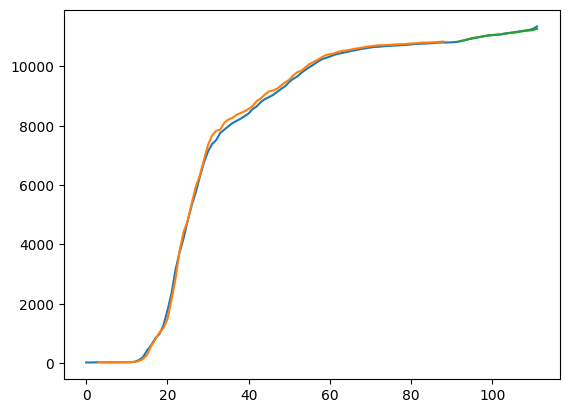

In [30]:
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(TrainPredict)+look_back, :] = TrainPredict
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(TrainPredict)+(look_back)*2:len(dataset), :] = TestPredict
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
